In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
kdf = pd.read_csv('tracks.csv')

In [5]:
kdf

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [131]:
# List of file paths
file_paths = [
    'mpd.slice.0-999.json',
    'mpd.slice.99000-99999.json',
    'mpd.slice.995000-995999.json',
    'mpd.slice.996000-996999.json',
    'mpd.slice.997000-997999.json',
    'mpd.slice.998000-998999.json',
    'mpd.slice.999000-999999.json',
    'mpd.slice.410000-410999.json',
    'mpd.slice.411000-411999.json',
    'mpd.slice.412000-412999.json',
    'mpd.slice.413000-413999.json',
    'mpd.slice.414000-414999.json',
    'mpd.slice.415000-415999.json',
    'mpd.slice.416000-416999.json',
    'mpd.slice.417000-417999.json',
    'mpd.slice.418000-418999.json',
    'mpd.slice.419000-419999.json',
    'mpd.slice.75000-75999.json',
    'mpd.slice.76000-76999.json',
    'mpd.slice.77000-77999.json',
    'mpd.slice.78000-78999.json',
    'mpd.slice.79000-79999.json',
    'mpd.slice.80000-80999.json',
    'mpd.slice.81000-81999.json',
    'mpd.slice.82000-82999.json',
    'mpd.slice.83000-83999.json',
    'mpd.slice.84000-84999.json'
    
]

# Initialize an empty list to store all data
all_data = []

# Iterate through each file
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        # Iterate through each playlist
        for playlist in data['playlists']:
            playlist_name = playlist['name']
            playlist_desc = playlist.get('description', '')  # Use .get() to handle missing descriptions
            # Iterate through each track in the playlist
            for track in playlist['tracks']:
                # Remove the "spotify:track:" prefix from the track_uri
                track_id = track['track_uri'].replace("spotify:track:", "")
                # Append the track data to the all_data list
                all_data.append({
                    'playlist_name': playlist_name,
                    'playlist_desc': playlist_desc,
                    'position_in_playlist': track['pos'],
                    'track_name': track['track_name'],
                    'id': track_id,  # Use the cleaned track ID
                    'artist_name': track['artist_name'],
                    'duration_ms': track['duration_ms'],
                    'album_name': track['album_name']
                })

# Convert the list of dictionaries into a DataFrame
xdf = pd.DataFrame(all_data)

# Display the DataFrame
print(xdf.head())

  playlist_name playlist_desc  position_in_playlist  \
0    Throwbacks                                   0   
1    Throwbacks                                   1   
2    Throwbacks                                   2   
3    Throwbacks                                   3   
4    Throwbacks                                   4   

                                   track_name                      id  \
0  Lose Control (feat. Ciara & Fat Man Scoop)  0UaMYEvWZi0ZqiDOoHU3YI   
1                                       Toxic  6I9VzXrHxO9rA9A5euc8Ak   
2                               Crazy In Love  0WqIKmW4BTrj3eJFmnCKMv   
3                              Rock Your Body  1AWQoqb9bSvzTjaLralEkT   
4                                It Wasn't Me  1lzr43nnXAijIGYnCT8M8H   

         artist_name  duration_ms  \
0      Missy Elliott       226863   
1     Britney Spears       198800   
2            Beyoncé       235933   
3  Justin Timberlake       267266   
4             Shaggy       227600   

       

In [157]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [132]:
kdf.dropna

<bound method DataFrame.dropna of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903    

In [133]:
xdf.dropna

<bound method DataFrame.dropna of         playlist_name playlist_desc  position_in_playlist  \
0          Throwbacks                                   0   
1          Throwbacks                                   1   
2          Throwbacks                                   2   
3          Throwbacks                                   3   
4          Throwbacks                                   4   
...               ...           ...                   ...   
1799355           💖💖💖                                  68   
1799356           💖💖💖                                  69   
1799357           💖💖💖                                  70   
1799358           💖💖💖                                  71   
1799359           💖💖💖                                  72   

                                          track_name                      id  \
0         Lose Control (feat. Ciara & Fat Man Scoop)  0UaMYEvWZi0ZqiDOoHU3YI   
1                                              Toxic  6I9VzXrHxO9rA9A5euc

In [134]:
dmz = pd.merge(xdf, kdf, on = 'id', how = 'inner')

In [135]:
dmz.dropna()

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Throwbacks,,0,Lose Control (feat. Ciara & Fat Man Scoop),0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,226863,The Cookbook,Lose Control (feat. Ciara & Fat Man Scoop),68,...,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4
1,Throwbacks,,1,Toxic,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,198800,In The Zone,Toxic,83,...,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4
2,Throwbacks,,2,Crazy In Love,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,235933,Dangerously In Love (Alben für die Ewigkeit),Crazy In Love (feat. Jay-Z),25,...,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4
3,Throwbacks,,3,Rock Your Body,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,267266,Justified,Rock Your Body,78,...,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,4
4,Throwbacks,,6,My Boo,68vgtRHr7iZHpzGpon6Jlo,Usher,223440,Confessions,My Boo,80,...,5,-8.238,1,0.1180,0.25700,0.000000,0.0465,0.676,86.412,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748745,💖💖💖,,56,Groupie Love (feat. A$AP Rocky),03hqMhmCZiNKMSPmVabPLP,Lana Del Rey,264037,Lust For Life,Groupie Love (feat. A$AP Rocky),64,...,9,-7.317,1,0.0398,0.11300,0.000001,0.0952,0.195,175.894,4
748746,💖💖💖,,57,Summer Bummer (feat. A$AP Rocky & Playboi Carti),5QqyRUZeBE04yJxsD1OC0I,Lana Del Rey,260672,Lust For Life,Summer Bummer (feat. A$AP Rocky & Playboi Carti),66,...,1,-8.570,1,0.1260,0.01550,0.000020,0.1990,0.137,134.981,4
748747,💖💖💖,,60,I Get The Bag (feat. Migos),1XRgIKC5TPwo7nWGyKqgG0,Gucci Mane,233087,Mr. Davis,I Get the Bag (feat. Migos),73,...,11,-5.475,1,0.1680,0.02320,0.000343,0.0993,0.425,139.948,4
748748,💖💖💖,,63,Jocelyn Flores,7m9OqQk4RVRkw9JJdeAw96,XXXTENTACION,119133,17,Jocelyn Flores,87,...,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,0.437,134.021,4


In [136]:
dmz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748750 entries, 0 to 748749
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   playlist_name         748750 non-null  object 
 1   playlist_desc         748750 non-null  object 
 2   position_in_playlist  748750 non-null  int64  
 3   track_name            748750 non-null  object 
 4   id                    748750 non-null  object 
 5   artist_name           748750 non-null  object 
 6   duration_ms_x         748750 non-null  int64  
 7   album_name            748750 non-null  object 
 8   name                  748750 non-null  object 
 9   popularity            748750 non-null  int64  
 10  duration_ms_y         748750 non-null  int64  
 11  explicit              748750 non-null  int64  
 12  artists               748750 non-null  object 
 13  id_artists            748750 non-null  object 
 14  release_date          748750 non-null  object 
 15  

In [159]:
dmzX = dmz.dropna(how = 'all')
dmzX

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Throwbacks,,0,Lose Control (feat. Ciara & Fat Man Scoop),0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,226863,The Cookbook,Lose Control (feat. Ciara & Fat Man Scoop),68,...,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4
1,Throwbacks,,1,Toxic,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,198800,In The Zone,Toxic,83,...,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4
2,Throwbacks,,2,Crazy In Love,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,235933,Dangerously In Love (Alben für die Ewigkeit),Crazy In Love (feat. Jay-Z),25,...,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4
3,Throwbacks,,3,Rock Your Body,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,267266,Justified,Rock Your Body,78,...,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,4
4,Throwbacks,,6,My Boo,68vgtRHr7iZHpzGpon6Jlo,Usher,223440,Confessions,My Boo,80,...,5,-8.238,1,0.1180,0.25700,0.000000,0.0465,0.676,86.412,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748745,💖💖💖,,56,Groupie Love (feat. A$AP Rocky),03hqMhmCZiNKMSPmVabPLP,Lana Del Rey,264037,Lust For Life,Groupie Love (feat. A$AP Rocky),64,...,9,-7.317,1,0.0398,0.11300,0.000001,0.0952,0.195,175.894,4
748746,💖💖💖,,57,Summer Bummer (feat. A$AP Rocky & Playboi Carti),5QqyRUZeBE04yJxsD1OC0I,Lana Del Rey,260672,Lust For Life,Summer Bummer (feat. A$AP Rocky & Playboi Carti),66,...,1,-8.570,1,0.1260,0.01550,0.000020,0.1990,0.137,134.981,4
748747,💖💖💖,,60,I Get The Bag (feat. Migos),1XRgIKC5TPwo7nWGyKqgG0,Gucci Mane,233087,Mr. Davis,I Get the Bag (feat. Migos),73,...,11,-5.475,1,0.1680,0.02320,0.000343,0.0993,0.425,139.948,4
748748,💖💖💖,,63,Jocelyn Flores,7m9OqQk4RVRkw9JJdeAw96,XXXTENTACION,119133,17,Jocelyn Flores,87,...,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,0.437,134.021,4


In [138]:
dmzX['synthness'] = (1 - dmzX['acousticness']) * dmzX['instrumentalness'] * dmzX['energy']

In [139]:
features =['duration_ms_x', 'popularity', 'valence', 'tempo', 'synthness']

In [140]:
X= dmzX[features].copy()

In [141]:
scaler=StandardScaler()

In [142]:
X_scaled=scaler.fit_transform(X)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0,X], X[:, 1], c=labels, cmap='virdis', edgecolors='K', alpha=0.7)
    plt.title(title)
    plt.xLabel(features[0])
    plt.yLabel(features[1])
    plt.show()
    

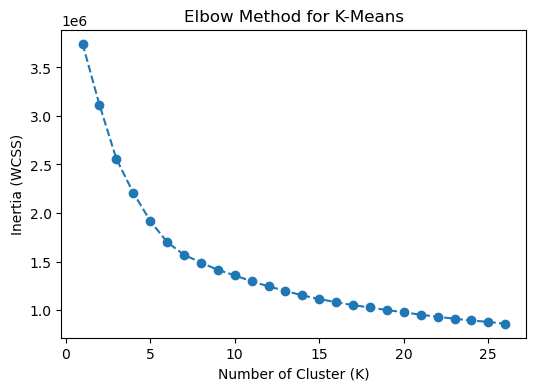

In [143]:
k_values = range(1,27)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for K-Means')
plt.show()